<a href="https://colab.research.google.com/github/wjdgoruds2/Digital_image_processing/blob/main/DNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255

#DNN의 구조
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))#입력 28*28데이터
model.add(Dense(10, activation='relu'))#노드10개
model.add(Dense(10, activation='relu'))#노드 10개
model.add(Dense(10, activation='softmax'))#출력층

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])#optimizer:어떻게 업데이트할지,loss:(crossentropy)->예상과 출력이 비슷할 경우만,metrics:지표
model.summary()#모델의 구조를 보여줌


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)#입력,출력,5번 반복,차원,한번에 128개씩->학습


loss, acc = model.evaluate(test_x, test_y)#모델 평가
print("loss=",loss)#차이(작아지도록 학습)
print("acc=",acc)#정확도(커지도록 학습)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 2ms/step - loss: 1.3426 - accuracy: 0.5495
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8791
Epoch 3/5
469/469 [==============================] - 1

(10000, 10)
[9.6596265e-04 8.2819124e-06 8.2122875e-05 1.0435039e-03 9.2752209e-08
 7.5052103e-06 3.3392784e-09 9.9772364e-01 2.9253428e-05 1.3969358e-04]


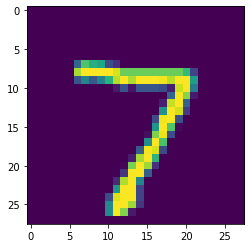

[7 2 1 ... 4 5 6]


In [12]:
y_=model.predict(test_x)
print(y_.shape)
print(y_[0])
plt.imshow(test_x[0])
plt.show()

predicted=np.argmax(y_,axis=1)
print(predicted)